In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=load_breast_cancer()
X=data.data
y=data.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Class shape:", data.target_names)
print("Features names:", data.feature_names[:5], "...")

Feature shape: (569, 30)
Target shape: (569,)
Class shape: ['malignant' 'benign']
Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ...


In [3]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 455
Test size: 114


In [4]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

print("Train mean (approx):", X_train_scaled.mean())
print("Test std (approx):", X_test_scaled.std())

Train mean (approx): -9.453081378317524e-16
Test std (approx): 0.9684571474192553


In [6]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred=knn.predict(X_test_scaled)
accuracy=accuracy_score(y_test, y_pred)

print("Accuracy with k=3:", accuracy)

Accuracy with k=3: 0.9473684210526315


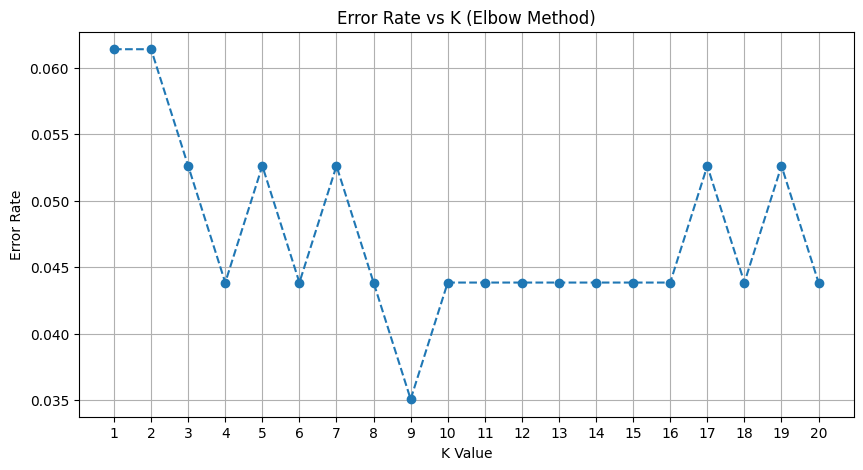

In [7]:
error_rate=[]

for k in range(1, 21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k=knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k !=y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='--')
plt.title("Error Rate vs K (Elbow Method)")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

In [8]:
k_values=range(1, 21)
cv_scores=[]

for k in k_values:
    knn_test=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn_test, X_train_scaled, y_train, cv=5)
    cv_scores.append(scores.mean())

best_k=k_values[cv_scores.index(max(cv_scores))]
print("Cross-Validation scores:", cv_scores)
print("Best K from cross-validation:", best_k)

Cross-Validation scores: [np.float64(0.9406593406593406), np.float64(0.9472527472527472), np.float64(0.9604395604395604), np.float64(0.9626373626373628), np.float64(0.9604395604395606), np.float64(0.9626373626373628), np.float64(0.9604395604395606), np.float64(0.9670329670329672), np.float64(0.9538461538461538), np.float64(0.9582417582417582), np.float64(0.9516483516483516), np.float64(0.9604395604395604), np.float64(0.9582417582417582), np.float64(0.9582417582417582), np.float64(0.9538461538461538), np.float64(0.956043956043956), np.float64(0.956043956043956), np.float64(0.9582417582417582), np.float64(0.9538461538461538), np.float64(0.956043956043956)]
Best K from cross-validation: 8


In [10]:
knn_final=KNeighborsClassifier(n_neighbors=8)
knn_final.fit(X_train_scaled, y_train)

y_pred_final=knn_final.predict(X_test_scaled)
final_accuracy=accuracy_score(y_test, y_pred_final)

print("Final Model Accuracy with K=8:", final_accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=data.target_names))

Final Model Accuracy with K=8: 0.956140350877193

Confusion Matrix:
[[41  2]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.95      0.94        43
      benign       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

